## NetworkX

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Undirected graph
G = nx.Graph()

Nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [3]:
G.clear()

# Add nodes and edges
G.add_node("A")
G.add_nodes_from(["B", "C"]) # Can add a list of nodes
G.add_nodes_from("DE") # This ass two nodes D and E

G.add_edge("A", "C")
G.add_edges_from([("B", "D"), ("B", "C")])
G.add_edges_from(["CD", "DE"]) # This add an edge ("C", "D")

In [4]:
# Can set the position of the nodes
pos = {
    "A": (1, 5),
    "B": (4.5, 6.6),
    "C": (3.6, 1.4),
    "D": (5.8, 3.5),
    "E": (7.9, 3.6),
}

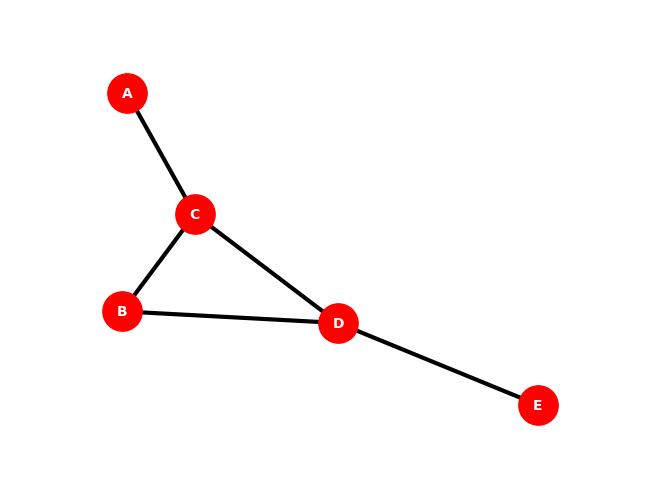

In [11]:
# Keep the graph same by setting random seed
seed = 0
random.seed(seed)
np.random.seed(seed)

# if we set pos, we don't need random seed
nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=800, font_color="white", 
        font_size=10, font_weight="bold", width=3)
plt.margins(0.2)
plt.show()

### Attributed Graph
Graph, Nodes and edges can have attributes.

In [12]:
# Undirected graph and add an attribute
G = nx.Graph()
G.graph["Name"] = "My Graph"

# Add nodes and edges with attributes, the names and values are arbitrary
# G.add_node("A", Age=19, Gender="F")
G.add_nodes_from([
    ("A", {"Age":19, "Gender":"F"}),
    ("B", {"Age":18, "Gender":"M"}),
    ("C", {"Age":22, "Gender":"M"}),
    ("D", {"Age":21, "Gender":"M"}),
    ("E", {"Age":20, "Gender":"F"})
])

# G.add_edge("A", "C", weight=1)
G.add_edges_from([
    ("A", "C", {"weight":1}),
    ("B", "C", {"weight":0.3}),
    ("B", "D", {"weight":0.5}),
    ("C", "D", {"weight":0.7}),
    ("D", "E", {"weight":1.2})
])

In [13]:
# Get the attribute of graph, node and edge
G.graph, G.nodes["A"], G.edges[("A", "C")]

({'Name': 'My Graph'}, {'Age': 19, 'Gender': 'F'}, {'weight': 1})

In [23]:
# iterate through nodes and print attributes (data=True)
for node in G.nodes(data=True):
    print(node)

('A', {'Age': 19, 'Gender': 'F'})
('B', {'Age': 18, 'Gender': 'M'})
('C', {'Age': 22, 'Gender': 'M'})
('D', {'Age': 21, 'Gender': 'M'})
('E', {'Age': 20, 'Gender': 'F'})


In [24]:
# iterate through edges and print attributes (data=True)
for edge in G.edges(data=True):
    print(edge)

('A', 'C', {'weight': 1})
('B', 'C', {'weight': 0.3})
('B', 'D', {'weight': 0.5})
('C', 'D', {'weight': 0.7})
('D', 'E', {'weight': 1.2})


### Degree and neighbors

In [25]:
print(f"# Nodes: {G.number_of_nodes()}")
print(f"# Edges: {G.number_of_edges()}")

# Nodes: 5
# Edges: 5


In [26]:
# Node degree
for node in G.nodes:
    print(f"Degree({node}) = {G.degree(node)}")

Degree(A) = 1
Degree(B) = 2
Degree(C) = 3
Degree(D) = 3
Degree(E) = 1


In [27]:
# Get nieghbors
for node in G.nodes:
    neighbor_list = [n for n in G.neighbors(node)]
    print(f"Neighbors({node}): {neighbor_list}")

Neighbors(A): ['C']
Neighbors(B): ['C', 'D']
Neighbors(C): ['A', 'B', 'D']
Neighbors(D): ['B', 'C', 'E']
Neighbors(E): ['D']


## Draw graph with attributes

In [28]:
# Use G.nodes to get the attributes of node
for node, attr in G.nodes(data=True):
    print(f"{node}, {attr}")

A, {'Age': 19, 'Gender': 'F'}
B, {'Age': 18, 'Gender': 'M'}
C, {'Age': 22, 'Gender': 'M'}
D, {'Age': 21, 'Gender': 'M'}
E, {'Age': 20, 'Gender': 'F'}


In [29]:
# Create a dictionary for drawing attribute labels
node_labels = {n:(d["Age"], d["Gender"]) for n, d in G.nodes(data=True)}
node_labels

{'A': (19, 'F'),
 'B': (18, 'M'),
 'C': (22, 'M'),
 'D': (21, 'M'),
 'E': (20, 'F')}

In [30]:
# set edge labels
edge_labels = {(u,v): d["weight"] for u,v,d in G.edges(data=True)}
edge_labels

{('A', 'C'): 1,
 ('B', 'C'): 0.3,
 ('B', 'D'): 0.5,
 ('C', 'D'): 0.7,
 ('D', 'E'): 1.2}

In [31]:
# set the coordinates of the node attributes
pos_node_attributes = {}
for node, (x,y) in pos.items():
    pos_node_attributes[node] = (x, y-0.9)
pos_node_attributes

{'A': (1, 4.1),
 'B': (4.5, 5.699999999999999),
 'C': (3.6, 0.4999999999999999),
 'D': (5.8, 2.6),
 'E': (7.9, 2.7)}

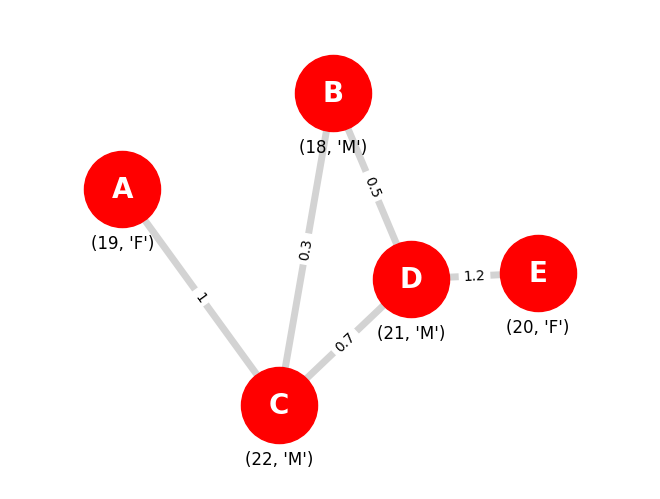

In [38]:
seed = 0
random.seed(seed)
np.random.seed(seed)

# draw graph
nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=3000, font_color="white", 
        font_size=20, font_weight="bold", width=5, edge_color="lightgray")

# draw labels
nx.draw_networkx_labels(G, pos=pos_node_attributes, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, label_pos=0.5)

plt.margins(0.2)
plt.show()

## Draw directed graph with weighted edges

{(1, 1): Text(0.8660253909248037, 0.6866025507323155, '0.1'),
 (2, 2): Text(0.4999999802144599, 1.0526279912449805, '0.1'),
 (4, 2): Text(-1.0373668137830805e-06, 0.8660254203963662, '0.3'),
 (5, 5): Text(-0.8660253508576763, 0.6866026103369591, '0.2'),
 (7, 5): Text(-0.8660253806596958, 5.1369712152915525e-06, '0.7'),
 (7, 7): Text(-0.8660254104623198, -0.31339739943179956, '0.3'),
 (7, 9): Text(-0.433020489488568, -0.7499954469021062, '0.2')}

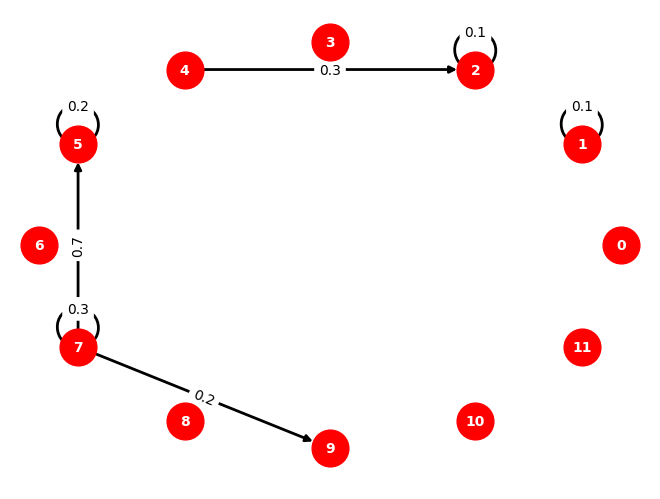

In [41]:
DG = nx.DiGraph()

# Add node and edges
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
edges = [(1, 1, 0.1), (2, 2, 0.1), (4, 2, 0.3), (5, 5, 0.2), (7, 5, 0.7), (7, 7, 0.3), (7, 9, 0.2)]
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(edges)

# Draw a circular graph
pos = nx.circular_layout(DG)
nx.draw(DG, with_labels=True, pos=pos, node_color="red", node_size=700, font_color="white", font_size=10, font_weight="bold", width=2)

edge_labels = {(u,v): d["weight"] for u,v,d in DG.edges(data=True)}
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels=edge_labels, label_pos=0.5)

In [42]:
DG.edges, DG.degree, DG.get_edge_data(7, 9)

(OutEdgeView([(1, 1), (2, 2), (4, 2), (5, 5), (7, 5), (7, 7), (7, 9)]),
 DiDegreeView({0: 0, 1: 2, 2: 3, 3: 0, 4: 1, 5: 3, 6: 0, 7: 4, 8: 0, 9: 1, 10: 0, 11: 0}),
 {'weight': 0.2})

### Extract edges from csv files

In [60]:
import csv
import networkx as nx
from collections import defaultdict

In [79]:
def get_midi_info(csv_path: str) -> dict:
    midi_info = {"track": [],
         "time": [],
         "channel": [],
         "note": [],
         "norm_note": []}
    with open(csv_path, newline='') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            if row[2].strip() == "Note_on_c": # Use strip() to remove leading/trailing whitespace
                # print(f"track {row[0]}, time {row[1]}, channel {row[3]}, note {row[4]}")
                midi_info["track"].append(row[0].strip())
                midi_info["time"].append(row[1].strip())
                midi_info["channel"].append(row[3].strip())
                midi_info["note"].append(row[4].strip())
    
    return midi_info


def get_weighted_edges(midi_info: dict) -> list:
    '''
    return list[(node, node, weight)]
    '''
    notes = midi_info["note"]
    weighted_edges = defaultdict(int)
    for i in range(len(notes) - 1):
        weighted_edges[(notes[i], notes[i+1])] += 1
    
    list_weighted_edges = [(u,v,d) for (u,v),d in list(weighted_edges.items())]
    return list_weighted_edges


def get_DG(nodes: set, weighted_edges: list) -> nx.classes.digraph.DiGraph:
    DG = nx.DiGraph()
    DG.add_nodes_from(nodes)
    DG.add_weighted_edges_from(weighted_edges)
    
    return DG


def draw_circular_DG(DiGraph, node_size=300, font_size=5, width=1, label_font_size=10):
    pos = nx.circular_layout(DiGraph)
    nx.draw(DiGraph, with_labels=True, pos=pos, node_color="red", node_size=node_size, font_color="white", font_size=font_size, font_weight="bold", width=width)
    edge_labels = {(u,v): d["weight"] for u,v,d in DiGraph.edges(data=True)}
    nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels=edge_labels, label_pos=0.5, font_size=label_font_size,)

In [5]:
DG = nx.DiGraph()

TLS_0_path = "csvs/TLS-0_measures/measure_1.csv"
TLS_1_path = "csvs/TLS-0_measures/measure_2.csv"
TLS_0_info = get_midi_info(TLS_0_path)
TLS_1_info = get_midi_info(TLS_1_path)

In [6]:
TLS_0_w_edges = get_weighted_edges(TLS_0_info)
TLS_1_w_edges = get_weighted_edges(TLS_1_info)

In [7]:
TLS_0_nodes = set(TLS_0_info["note"])
TLS_1_nodes = set(TLS_1_info["note"])
TLS_0_DG = get_DG(TLS_0_nodes, TLS_0_w_edges)
TLS_1_DG = get_DG(TLS_1_nodes, TLS_1_w_edges)

In [ ]:
draw_circular_DG(TLS_0_DG)

In [ ]:
draw_circular_DG(TLS_1_DG)

Need to consider: half-note, different pitch but same note.

### Compute similarity between two graphs

Paper that might be useful:
https://www.cs.cmu.edu/~jingx/docs/DBreport.pdf

In [10]:
nx.graph_edit_distance(TLS_0_DG, TLS_1_DG)

5.0

## Use pretty_midi to get note info

In [43]:
import pretty_midi
import midiFile

midi_path = 'data/clean_midi/ABBA/Dancing Queen.mid'
theMidiFile = midiFile.MidiFile(midi_path)
pm = pretty_midi.PrettyMIDI(midi_path)
pm.remove_invalid_notes()

In [57]:
# Get the piano
for i in pm.instruments:
    if i.program == 0:
        thePiano = i
        break

intervals = np.array([(pm.time_to_tick(note.start), pm.time_to_tick(note.end)) for note in thePiano.notes])
notes = np.array([note.pitch for note in thePiano.notes])
notes = notes.reshape(-1, 1)
note_interval = np.concatenate((notes, intervals), 1)
print("Piano note_interval (not, start_tick, end_tick): ")
print(note_interval)

Piano note_interval (not, start_tick, end_tick): 
[[  108   534   558]
 [  107   552   571]
 [  105   566   582]
 ...
 [   73 73534 73638]
 [   80 73678 73712]
 [   71 73678 73720]]


In [69]:
notes = np.array([note.pitch for note in thePiano.notes])
note_set = set(notes)
weighted_edges = defaultdict(int)
for i in range(len(notes) - 1):
    weighted_edges[(notes[i], notes[i+1])] += 1

list_weighted_edges = [(u,v,d) for (u,v),d in list(weighted_edges.items())]
    

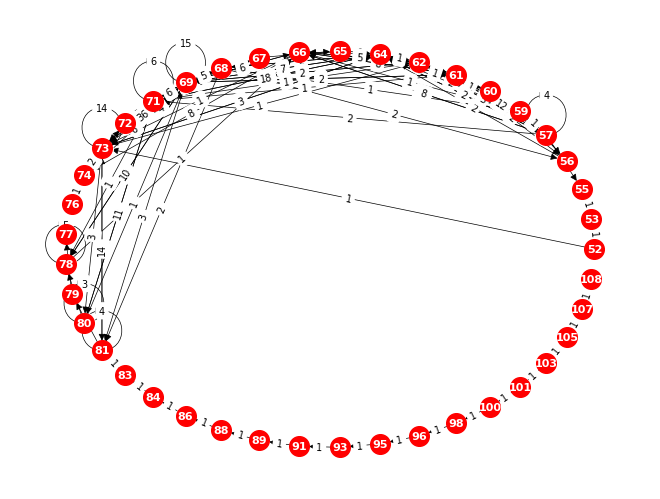

In [85]:
theDG = get_DG(note_set, list_weighted_edges)
draw_circular_DG(theDG, node_size=200, font_size=8, width=0.5, label_font_size=7)

In [53]:
ticks_per_beat = theMidiFile.midi_file.ticks_per_beat
beats = pm.get_beats()
ticks = np.array([pm.time_to_tick(t) for t in beats]) # convert sec to tick
# print(f"ticks per beat: {ticks_per_beat}")
# print(f"ticks per measure: {theMidiFile.current_ticks_per_measure}")
# print(f"ticks: {ticks}")